In [ ]:
!pip install -Uq pymcel

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 76.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 63.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 50.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pymcel as pc
import plotly.subplots as go
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.integrate import cumulative_trapezoid

pymcel version  0.6.30


#  **Simulación de las trayectorias**

 El jet se propaga a lo largo del eje $z$ y se caracteriza por un campo magnético helicoidal, sin componentes del campo eléctrico ($\vec{E} =0$).

 El campo magnético está dado por $B = B_z \hat{e}_z + B_\phi(r)\hat{e}_z$, con una componente poloidal constante $B_z=B_0$ y una componente toroidal $B_\phi = B_1/r$.

Sabemos que en coordenadas cilíndricas $(r,\phi,z)$, la posición se expresa como:

$$
\vec{r} = r\hat{e}_r + z\hat{e}_z
$$

donde:

$$
r = \sqrt{x^2+y^2} , \quad \phi = \tan^{-1}\left(\frac{y}{x}\right)
$$

de modo que los vectores unitarios $\hat{e}_r$ y $\hat{e}_\phi$ dependen del ángulo $\phi$:

$$
\hat{e}_r = (\cos\phi, \sin \phi, 0),\quad \hat{e}_\phi=(-\sin \phi, \cos \phi, 0) , \quad \hat{e}_z = (0,0,1)
$$

Además, sabemos que la transformación de coordenadas de cilíndricas a cartesianas está dada por:

$$
\cos \phi = \frac{x}{r}, \quad \sin \phi = \frac{y}{r}, \quad z=z
$$

De este modo remplazando en los vectores unitarios obtenemos:

$$
\hat{e}_r = \left(\frac{x}{r},\frac{y}{r},0 \right), \quad \hat{e}_\phi = \left(-\frac{y}{r},\frac{x}{r}, \right), \quad \hat{e}_z = (0,0,1)
$$

Teniendo esto en cuenta, podemos expresar el campo magnético helicoidal en coordenas cartesianas $(x,y,z)$.

De esta forma, la componente toroidal se puedes escribir como:

$$\vec{B}_{\phi} = \frac{B_1}{r} \left( -\frac{y}{r} \hat{i} + \frac{x}{r} \hat{j} , 0\hat{z} \right) = -\frac{B_1 y}{x^2 + y^2} \hat{i} + \frac{B_1 x}{x^2 + y^2} \hat{j} $$

Similarmente, la componente poloidal se puedde escribir como:

$$
\vec{B}_z = B_z\hat{e}_z = B_0\hat{k} = (0\hat{i}, 0\hat{j}, B_0\hat{k})
$$

Luego, el campo magnético total en coordenadas cartesianas es:

$$\vec{B} = \left( -\frac{B_1 y}{x^2 + y^2} \right) \hat{i} + \left( \frac{B_1 x}{x^2 + y^2} \right) \hat{j} + B_0 \hat{k} $$



## **Tensor de Faraday**

Sabemos que el tensor de Faraday en su forma contravariante $F^{\mu\nu}$ está definido como:


$$
F^{\mu\nu} = \begin{pmatrix}
0 & -E_x/c & -E_y/c & -E_z/c \\
E_x/c & 0 & -B_z & B_y \\
E_y/c & B_z & 0 & -B_x \\
E_z/c & -B_y & B_x & 0
\end{pmatrix}
$$

Si asumimos un campo eléctrico nulo ($\vec{E}=0$) en el sistema de referencia del jet, podemos reescribir el tensor como:

$$
F^{\mu\nu} = \begin{pmatrix}
0 & 0 & 0 & 0 \\
0 & 0 & -B_z & B_y \\
0 & B_z & 0 & -B_x \\
0 & -B_y & B_x & 0
\end{pmatrix} = F_{\mu\nu}
$$

Usando la métrica de Minkowski $\eta_{\mu\nu} = \text{diag}(1, -1, -1, -1)$, y teniendo en cuenta que las componentes  del campo magnético son:  
$B_x = -\frac{B_1 y}{x^2 + y^2},  B_y = \frac{B_1 x}{x^2 + y^2},  B_z = B_0$, podemos escribir finalmente el tensor de Farady como:

$$
F^{\mu\nu} =
\begin{pmatrix}
0 & 0 & 0 & 0 \\
0 & 0 & -B_0 & \frac{B_1 x}{x^2 + y^2} \\
0 & B_0 & 0 & \frac{B_1 y}{x^2 + y^2} \\
0 & -\frac{B_1 x}{x^2 + y^2} & -\frac{B_1 y}{x^2 + y^2} & 0
\end{pmatrix}
$$

O en forma tensorial como:

$$
F^{ij}=-ɛ^{ikj}B_k
$$


## **Ecuaciones covariantes del movimiento**

Para describir el movimiento de la partícula, partimos de las definiciones relativistas de la cuadrivelocidad y el cuadrimomento.

Sabemos que la cuadrivelocidad está dada por $U^\mu = γ(c, \vec{v})$ o en unidades relativistas $U_L^\mu = γ(1, \vec{v}_L)$.

Por definición, sabemos que el momentum se define como el producto de la masa de un cuerpo por su velocidad, es decir que para la relatividad podemos definir el momentum como el producto de la masa invariante por la cuadrivelocidad:

$$
p^\mu = m U^\mu = (\gamma mc, \gamma m \vec{v})
$$

O en unidades luz, podemos escribir el momento relativista como:

$$
p_L^\mu = m U_L^\mu = (\gamma m, \gamma m \vec{v}_L)
$$




La ecuación de movimiento covariante está dada por:

$$\frac{dp^\mu}{d\tau} = f^\mu$$
donde $f^μ$ es la cuadrifuerza de Lorentz definida por:

$$f^\mu = \frac{q}{c} F^{\mu\nu} U_\nu $$

donde $U_\nu = \eta_{\nu\sigma} U^\sigma$ es la cuadrivelocidad covariante, con $\eta_{\mu\nu} = \text{diag}(1,-1,-1,-1)$.

Remplazando $p^\mu = m U^\mu$ en la ecuación de movimiento y suponiendo que la masa $m$ es constante tenemos:

$$
\frac{dp^\mu}{d\tau} =\frac{d(mU^\mu)}{d\tau}=m\frac{dU^\mu}{d\tau}
$$

Igualando esto a la ecuación de cuadrifuerza:

$$
m\frac{d(U^\mu)}{d\tau} =  \frac{q}{c} F^{\mu\nu} U_\nu
$$

Combinando, tenemos la ecuación diferencial para la cuadrivelocidad que queremos resolver:

$$\frac{dU^\mu}{d\tau} = \frac{q}{mc} F^{\mu\nu} U_\nu $$

O en unidades luz:

$$\frac{dU_L^\mu}{d\tau} = \frac{q}{m} F^{\mu\nu} U_{L\nu} $$




### **Componentes de la cuadriaceleración**

Sabemos que podemos definir la cuadriaceleración como la derivada de la cuadrivelocidad:

$$
A_L^\mu = \frac{dU_L^\mu}{d\tau}
$$

donde la componente temporal ($\mu=0$) está dada por:

$$
A_L^0 = \frac{dU_L^0}{d\tau}=\frac{q}{m}F^{0\nu}U_{L\nu} = \frac{q}{m}(F^{00}U_{L0}+F^{01}U_{L1}+F^{02}U_{L2}+F^{03}U_{L3})
$$

Para un campo magnético puro ($E=0$), las componentes $F^{0i}$ son nulas, dado que $F^{00}=0$, el resultado es:
$$
A_L^0 = \frac{dU_L^0}{d\tau} = 0
$$
Lo cual implica que

$$
\frac{dU_L^0}{d\tau} = \frac{d\gamma}{d\tau} =0
$$

Es decir, un campo magnético puro no realiza trabajo, por lo que su energía relativista $E = \gamma m$ (y por ende su factor $\gamma$) se conserva.

De igual forma, para las componentes espaciales ($\mu = 1,2,3$) tenemos que la parte espacial de la ecuación de la cuadrifuerza se reduce a:


$$
\frac{d(\gamma\vec{v}_L)}{d\tau} = \frac{q\gamma}{m} (\vec{v}_L \times \vec{B})
$$

Usando la definición de las componentes espaciales de la cuadrivelocidad, ${U}_{L}^\mu = \gamma\vec{v}_L = (U_{L}^x, U_{L}^y, U_{L}^z)$, la ecuación se escribe como:
$$
\frac{d{U}_{L}^\mu}{d\tau} = \frac{q}{m} ({U}_{L}^\mu \times \vec{B})
$$
Al calcular explícitamente el producto cruz y sustituir las componentes del campo magnético:
$$
\vec{B} = \left( -\frac{B_1 y}{x^2+y^2}, \frac{B_1 x}{x^2+y^2}, B_0 \right)
$$
se obtienen las ecuaciones para cada componente espacial de la cuadriaceleración:
$$
\begin{align}
\frac{dU_{L}^x}{d\tau} &= \frac{q}{m} (U_{L}^y B_z - U_{L}^z B_y) = \frac{q}{m} \left( U_{L}^y B_0 -  U_{L}^z \frac{B_1 x}{x^2+y^2} \right) \\[10pt]
\frac{dU_{L}^y}{d\tau} &= \frac{q}{m} ( U_{L}^z B_x - U_{L}^x B_z) = \frac{q}{m} \left( - U_{L}^z \frac{B_1 y}{x^2+y^2} - U_{L}^x B_0 \right) \\[10pt]
\frac{dU_{L}^z}{d\tau} &= \frac{q}{m} (U_{L}^x B_y - U_{L}^y B_x) = \frac{q}{m} \left( U_{L}^x \frac{B_1 x}{x^2+y^2} + U_{L}^y \frac{B_1 y}{x^2+y^2} \right) = \frac{q}{m} \frac{B_1 (x U_{L}^x + y U_{L}^y)}{x^2+y^2}
\end{align}
$$


De esta forma, el estado el sistema se describe por el vector $Y = [t, x, y, z, U_{Lx}, U_{Ly}, U_{Lz}]$.

Las derivadas de las 6 variables espaciales $(x, y, z, U_{Lx}, U_{Ly}, U_{Lz})$ respecto al tiempo propio $\tau$ ya se han obtenido.

La derivada de la coordenada temporal $t$ se obtiene de la componente $U_L^0$:
$$
U_L^0 = \frac{dX^0}{d\tau} = \frac{dt}{d\tau}
$$
Usando la invarianza de la norma de la 4-velocidad, $U^\mu U_\mu = 1$:
$$
(U_L^0)^2 - (U_{Lx}^2 + U_{Ly}^2 + U_{Lz}^2) = 1
$$


Por tanto:
$$
U_L^0= \sqrt{1 -(U_L^\mu)^2}
$$


In [ ]:
# Constantes físicas del problema
q = - pc.constantes.e # Carga del electrón[C]
m = pc.constantes.m_e # Masa del electrón [kg]
c = pc.constantes.c # Velocidad de la luz [m/s]
k = q / m
G2T = 1e-4 # Constante de cambio de unidades de Gauss a Tesla

In [ ]:
# Parámetros del Jet
B0 = 5.0 # Campo poloidal [G]
B1 = 0.3 #Campo toroidal [G]
gamma0 = 30 # Factor de Lorentz
R0  = 1 # Radio inicial [m]
r_min = 0.01 # Radio mínimo [m]

# Conversión a unidades del SI
B0 = B0 * G2T # Campo poloidal [T]
B1 = B1 * G2T # Campo toroidal [T]

Por lo visto antes, pdemos deducir que el sistema completo de 7 EDOs de primer orden estará dado por:
$$
\begin{align}
\frac{dt}{d\tau} &= \sqrt{1 + (U_L^x)^2 + (U_L^y)^2 +(U_L^z)^2} \\[10pt]
\frac{dx}{d\tau} &= (U_L^x) \\[10pt]
\frac{dy}{d\tau} &= (U_L^y) \\[10pt]
\frac{dz}{d\tau} &=(U_L^z) \\[10pt]
\frac{dU_L^x}{d\tau} &= \frac{q}{m} \left( U_L^y B_0 - \frac{B_1 xU_L^z}{x^2+y^2} \right) \\[10pt]
\frac{dU_L^y}{d\tau} &= \frac{q}{m} \left( -U_L^x B_0 - \frac{B_1 yU_L^z)}{x^2+y^2} \right) \\[10pt]
\frac{dU_{Lz}}{d\tau} &= \frac{q}{m} \left( \frac{B_1 x U_L^x + y U_L^y}{x^2+y^2} \right)
\end{align}
$$

In [ ]:
def ecuaciones_movimiento(tau, Ys): # En unidades del SI
  t, x, y, z, ux, uy, uz = Ys

  r2 = x*x + y*y
  if r2 < r_min**2:
    r2 = r_min**2

  # Componentes del campo magnético helicoidla (SI)
  Bx = -B1 * y / r2
  By = B1 * x / r2
  Bz = B0

  U2 = ux*ux + uy*uy + uz*uz
  dt_dtau = np.sqrt(1 + U2/c**2)

  # Componentes de la velocidad(espacial)
  dx_dtau = ux
  dy_dtau = uy
  dz_dtau = uz

  # dU/dτ = (q/m) U × B   (con E=0)
  dux = k * (uy * Bz - uz * By)
  duy = k * (uz * Bx - ux * Bz)
  duz = k * (ux * By - uy * Bx)

  return np.array([dt_dtau, dx_dtau, dy_dtau, dz_dtau , dux, duy, duz])

Sabemos que el factor de Lorentz ($\gamma$) está dado por:
$$
\gamma = \frac{1}{\sqrt{1 - \frac{v^2}{c^2}}}
$$

En nuestras condiciones iniciales, la velocidad total $v$ es únicamente en la dirección $z$, por lo que $v = v_z$, si sustituimos esto en la ecuación:
$$
\gamma_0 = \frac{1}{\sqrt{1 - \frac{v_z^2}{c^2}}}
$$

Ahora, despejamos $v_z$ algebraicamente:

$$
\gamma_0^2 = \frac{1}{1 - \frac{v_z^2}{c^2}}
$$

Inviertiendon la fracción en ambos lados:
$$
\frac{1}{\gamma_0^2} = 1 - \frac{v_z^2}{c^2}
$$

Reorganizamos la ecuación:
    $$
    \frac{v_z^2}{c^2} = 1 - \frac{1}{\gamma_0^2}
    $$

Multiplicando ambos lados por $c^2$:
$$
v_z^2 = c^2 \left( 1 - \frac{1}{\gamma_0^2} \right)
$$

Finalmente, tomamos la raíz cuadrada para obtener $v_z$:
$$
v_z = c \sqrt{1 - \frac{1}{\gamma_0^2}}
$$

O equivalenteme en unidades relativistas como:

$$
v_{zL} = \sqrt{1 - \frac{1}{\gamma_{0L}^2}}
$$


In [ ]:
# Condiciones inicales

# Velocidad inicial relativista en dirección z
v0z = c * np.sqrt(1 - 1 / (gamma0**2))

# Posición inicial: (x0, y0, z0)
x0, y0, z0 = R0, 0.0, 0.0

# Cuadrivelocidad inicial: U^i = gamma * v^i
ux0, uy0, uz0 = 0.0, 0.0, gamma0 * v0z

# Vector de estado inicial
t0 = 0.0
Y0 = [t0, x0, y0, z0, ux0, uy0, uz0]

In [ ]:
# Parámetros para la integración numérica
tau_max = 5e-6 # Tiempo propio [s]
N = 2000 # Número de puntos
tau_span = (0, tau_max)
tau_eval = np.linspace(0, tau_max, N)

In [ ]:
# Resolvemos el sistema de EDOS usando DOP853
sol = solve_ivp(
    ecuaciones_movimiento,
    tau_span,
    Y0,
    t_eval=tau_eval,
    method = 'DOP853',
    rtol=1e-9, atol=1e-12)

In [ ]:
# Extramos las trayectorias de cada componente
t = sol.y[0]
x = sol.y[1]
y = sol.y[2]
z = sol.y[3]
ux = sol.y[4]
uy = sol.y[5]
uz = sol.y[6]

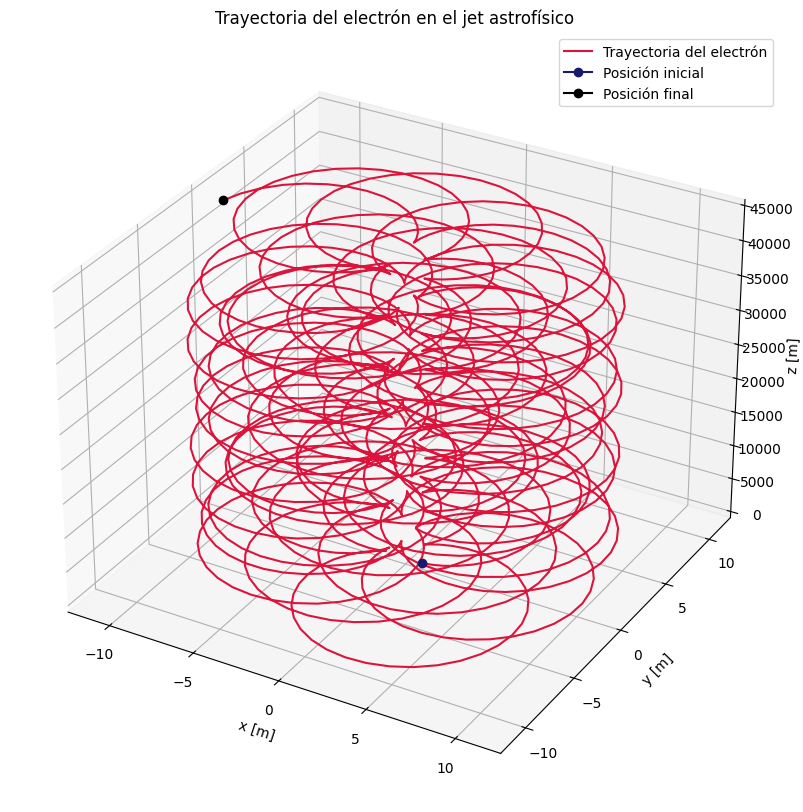

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.plot(x, y, z, color='crimson', label='Trayectoria del electrón')
ax.plot(x[0], y[0], z[0], marker='o', color='midnightblue', label='Posición inicial')
ax.plot(x[-1], y[-1], z[-1], marker='o', color='black', label='Posición final')
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
ax.set_zlabel('z [m]')
ax.set_title('Trayectoria del electrón en el jet astrofísico')
ax.legend()
plt.show()

Podemos ceque el electrón avanza de forma longitudinal a lo largo del eje del jet mientras describe una rotación en torno a dicho eje, de modo que su trayectoria resulta de la superposición de ambos movimientos.

Veamos entonces cómo se ve la trayectoria del electrón desde diferentes planos

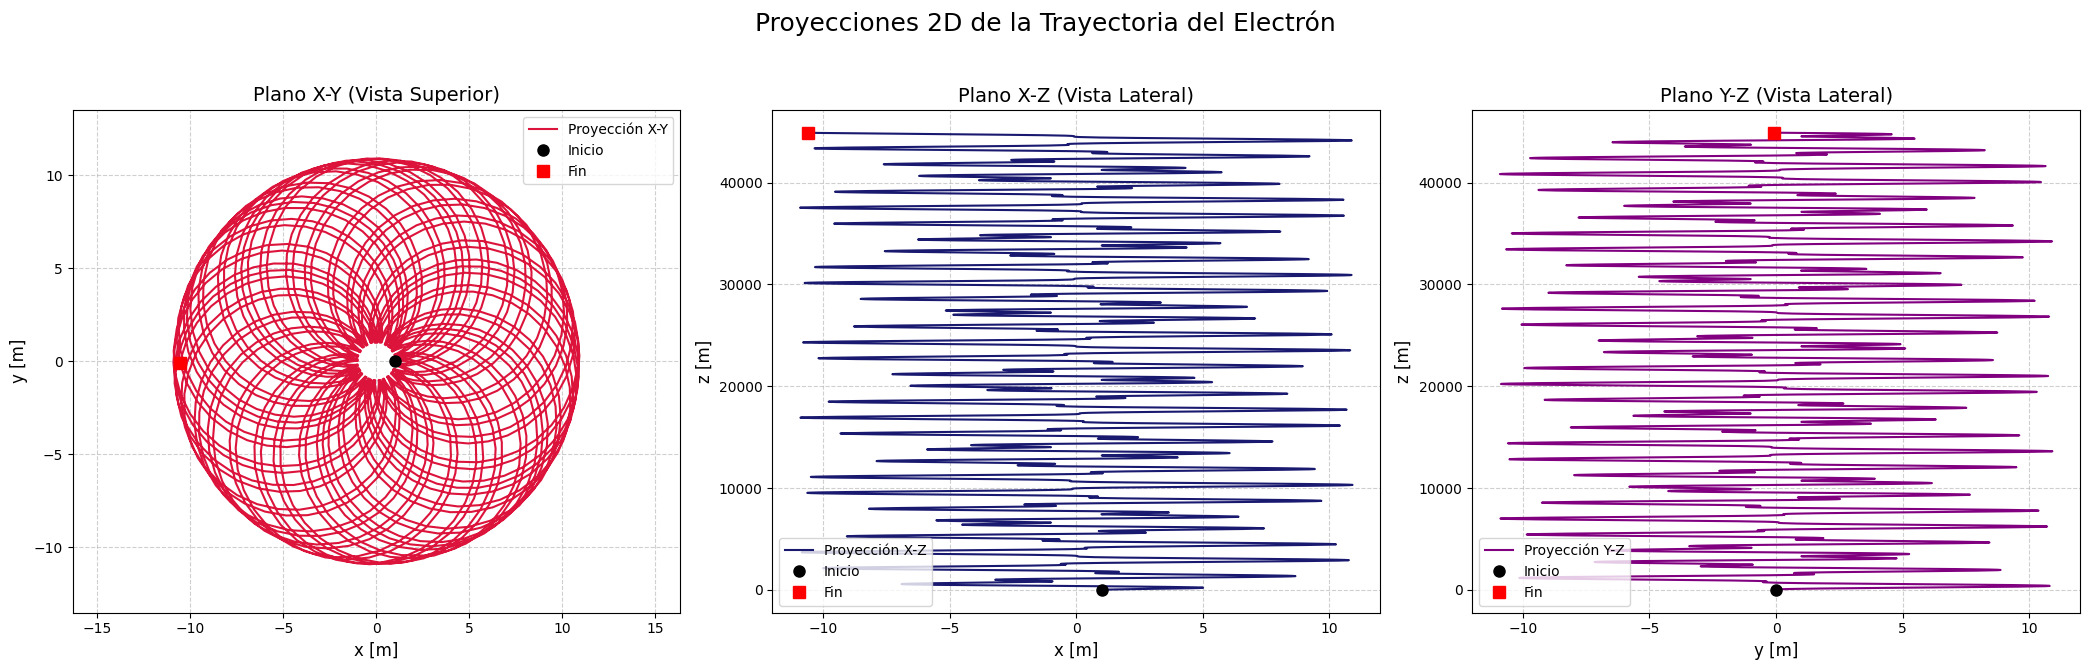

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21, 7))

# Plano xy
ax1.plot(x, y, color='crimson', label='Proyección X-Y')
ax1.plot(x[0], y[0], 'ko', markersize=8, label='Inicio')
ax1.plot(x[-1], y[-1], 'rs', markersize=8, label='Fin')
ax1.set_xlabel('x [m]', fontsize=12)
ax1.set_ylabel('y [m]', fontsize=12)
ax1.set_title('Plano X-Y (Vista Superior)', fontsize=14)
ax1.axis('equal')
ax1.legend()
ax1.grid(True, linestyle='--', alpha=0.6)

#  Plano xz
ax2.plot(x, z, color='midnightblue', label='Proyección X-Z')
ax2.plot(x[0], z[0], 'ko', markersize=8, label='Inicio')
ax2.plot(x[-1], z[-1], 'rs', markersize=8, label='Fin')
ax2.set_xlabel('x [m]', fontsize=12)
ax2.set_ylabel('z [m]', fontsize=12)
ax2.set_title('Plano X-Z (Vista Lateral)', fontsize=14)
ax2.legend()
ax2.grid(True, linestyle='--', alpha=0.6)

# Plano yz
ax3.plot(y, z, color='purple', label='Proyección Y-Z')
ax3.plot(y[0], z[0], 'ko', markersize=8, label='Inicio')
ax3.plot(y[-1], z[-1], 'rs', markersize=8, label='Fin')
ax3.set_xlabel('y [m]', fontsize=12)
ax3.set_ylabel('z [m]', fontsize=12)
ax3.set_title('Plano Y-Z (Vista Lateral)', fontsize=14)
ax3.legend()
ax3.grid(True, linestyle='--', alpha=0.6)


plt.suptitle('Proyecciones 2D de la Trayectoria del Electrón', fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# **Cinemática y electrodinámica relativista**

## Verificación de la ortogonalidad $U^\mu A_\mu = 0$

Sabemos que por definición, la cuadriaceleración es la derivada respecto al tiempo propio de la cuadrivelocidad:

$$
A^\mu = \frac{dU^\mu}{d\tau}
$$

Pero por lo visto anteriormente

$$
\frac{dU^\mu}{d\tau} = \frac{q}{m}U\times B
$$

Por tanto:

$$A^\mu = (A^0, A^i) = \left( 0, \frac{q}{m}U \times B \right)$$

De nuestro sistema de ecuaciones podemos tomar las derivadas de las velocidades $\frac{dU_L^i}{d\tau}$  para obtener las componentes espaciales de la cuadriaceleración $A^i = (A^1, A^2, A^3)$ en cada punto. La componente temporal $A^0$ es cero, ya que el campo magnético no realiza trabajo.

In [ ]:
# Campo B a lo largo de la trayectoria
r2 = x*x + y*y
r2 = np.where(r2 < r_min**2, r_min**2, r2)
Bx = -B1 * y / r2
By =  B1 * x / r2
Bz =  B0 * np.ones_like(x)

# Calculamos ñas componentes de la cuadriaceleracion A^i = dU^i/dτ = (q/m) U × B
Ax = k * (uy * Bz - uz * By)
Ay = k * (uz * Bx - ux * Bz)
Az = k * (ux * By - uy * Bx)

# Podemos calcular U0 a partir de gamma
u2     = ux*ux + uy*uy + uz*uz
gamma_ = np.sqrt(1.0 + u2/(c*c))
U0 = c * gamma_

# A^0(τ) a partir de identidad relativista
# U^0 = c*gamma(u),  dU^0/dτ = (u·a)/(c*gamma)
udota = ux*Ax + uy*Ay + uz*Az
A0    = udota / (c * gamma_)

# Calculamos el producto escalar
UdotA = U0*A0 - udota

In [ ]:
print(f"El valor medio del producto escalar entre la cuadrivelocidad y la cuadriaceleración es {np.mean(UdotA):.6}")

El valor medio del producto escalar entre la cuadrivelocidad y la cuadriaceleración es 1.30385e-10


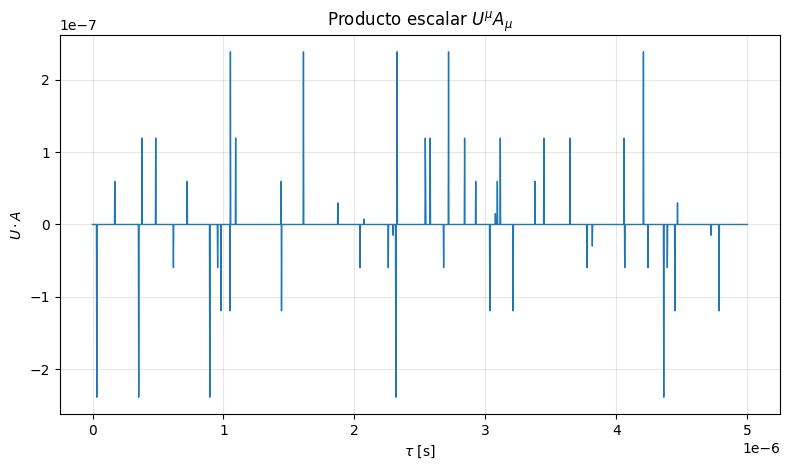

In [ ]:
plt.figure(figsize=(8,4.8))
plt.plot(tau_eval, UdotA, lw=1)
plt.xlabel(r'$\tau$ [s]')
plt.ylabel(r'$U\cdot A$')
plt.title(r'Producto escalar $U^\mu A_\mu$')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Podemos ver que los valores del producto escalar entre la cuadrivelocidad y la cuadriaceleración oscilan alrededor de cero, con fluctuaciones pequeñas del orden de $10^{-7}$

## Relación del tiempo propio y el tiempo coordenado

Sabemos que en el sistema en reposo de la partícula ($S'$) se cumple $dx' = dy' = dz' = 0$. Por definición de tiempo propio,

$$ds^2 = c^2 \, d\tau^2$$

Por otro lado, en el sistema del laboratorio ($S$) el elemento de línea es

$$ds^2 = c^2 \, dt^2 - dx^2 - dy^2 - dz^2$$

Igualando ambas expresiones:

$$c^2 \, d\tau^2 = c^2 \, dt^2 - dx^2 - dy^2 - dz^2$$

Dividiendo por $d\tau^2$ tenemos que

$$\left(c \, \frac{dt}{d\tau}\right)^2 - \left[ \left(\frac{dx}{d\tau}\right)^2 + \left(\frac{dy}{d\tau}\right)^2 + \left(\frac{dz}{d\tau}\right)^2 \right] = c^2$$

Reordenando, (y dividiendo por $c^2$):

$$\left(\frac{dt}{d\tau}\right)^2 = 1 + \frac{1}{c^2}\left(\frac{dx}{d\tau}\right)^2 + \frac{1}{c^2}\left(\frac{dy}{d\tau}\right)^2 + \frac{1}{c^2}\left(\frac{dz}{d\tau}\right)^2$$

Podemos definir la cuadrivelocidad como$$U^\mu = \frac{dx^\mu}{d\tau} = (U^0, \vec{U}) = (\gamma c, \gamma \vec{v}),$$

entonce tenemos que $U^0 = c \, \frac{dt}{d\tau} = c\gamma$ y $U^i = \frac{dx^i}{d\tau} = \gamma v^i$

Por tanto

$$\frac{dt}{d\tau} = \gamma = \frac{1}{\sqrt{1 - \frac{v^2}{c^2}}}$$

Entonces
$$d\tau = \frac{dt}{\gamma}$$

O en forma integral,$$\tau(t) = \int_0^t \frac{dt'}{\gamma(t')}$$

 si $\gamma$ es constante entonces:
 .
 $$\tau = \frac{t}{\gamma}$$(asumiendo $\tau(0)=0$)

In [ ]:
# Calculamos la magnitud espacial de la cuadrivelocidad
U2 = ux**2 + uy**2 + uz**2
gamma_ = np.sqrt(1.0 + U2 / (c**2))  # gamma(τ_i) usando U = (ux, uy, uz)

# Calculamos tau a partir del tiempo coordenado
taut = cumulative_trapezoid(1.0 / gamma_, t, initial=0.0)

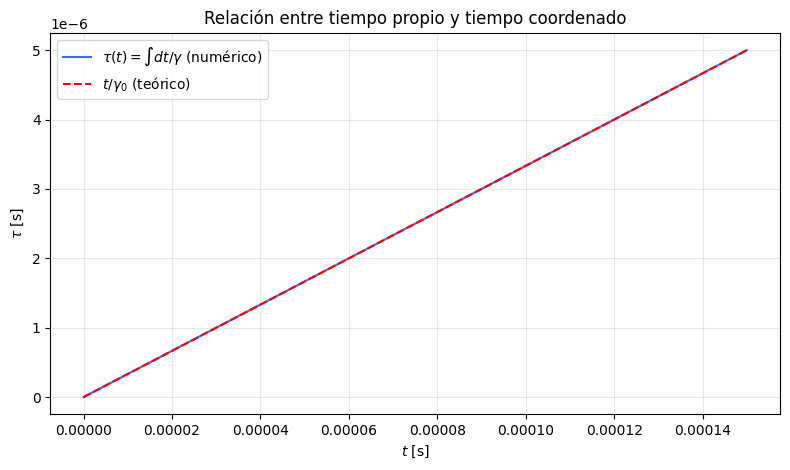

In [ ]:
plt.figure(figsize=(8, 4.8))
plt.plot(t, taut, color='royalblue',
         label=r'$\tau(t)=\int dt/\gamma$ (numérico)')
plt.plot(t, t / gamma0, 'r--', label=r'$t/\gamma_0$ (teórico)')
plt.xlabel(r'$t$ [s]')
plt.ylabel(r'$\tau$ [s]')
plt.legend()
plt.title(r'Relación entre tiempo propio y tiempo coordenado')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## Módulo de la cuadrivelocidad

Por definición, la cuadrivelocidad $U^\mu$ es:

$$U^\mu = \frac{dx^\mu}{d\tau} = (U^0, U^x, U^y, U^z) = (\gamma c, \gamma v_x, \gamma v_y, \gamma v_z)$$

donde $\gamma = (1 - v^2/c^2)^{-1/2}$

El producto interno es:

$$U^\mu U_\mu = (U^0)^2 - (U^x)^2 - (U^y)^2 - (U^z)^2$$

Sustituyendo las componentes:

$$U^\mu U_\mu = (\gamma c)^2 - (\gamma v_x)^2 - (\gamma v_y)^2 - (\gamma v_z)^2$$

Agrupando los términos espaciales:

$$U^\mu U_\mu = \gamma^2 c^2 - \gamma^2 (v_x^2 + v_y^2 + v_z^2) = \gamma^2 (c^2 - v^2)$$

Finalmente, usando la definición de $\gamma^2$:

$$U^\mu U_\mu = \left( \frac{1}{1 - v^2/c^2} \right)  c^2(1 - v^2/c^2) = c^2$$

Es decir, la norma de la cuadrivelocidad es un invariante de Lorentz y siempre es igual a la velocidad de la luz.

$$|U| = \sqrt{U^\mu U_\mu} = \sqrt{c^2} = c$$

O equivalentemente:

$$
\frac{U^\mu U_\mu}{c^2}=1
$$

In [ ]:
# Componentes espaciales de la cuadrivelocidad: ux, uy, uz
Ui = sol.y[4:7]  # U = (ux, uy, uz)
Ui_mag = np.sum(Ui**2, axis=0)  # |U|^2 = ux^2 + uy^2 + uz^2

# Componente temporal: U^0 = c * gamma = sqrt(c^2 + |U|^2)
U_0 = np.sqrt(c**2 + Ui_mag)

# Invarianza: (U^0)^2 - |U|^2 = c^2
Umu_mag = U_0**2 - Ui_mag

Veamos entonces que

In [ ]:
print(f"El producto interno de la cuadrivelocidad es {np.mean(Umu_mag)}")
print(f"Veamos que la magnitud de la cuadrivelocidad es una invariante de Lorentz {np.mean(Umu_mag)/c**2}")

El producto interno de la cuadrivelocidad es 8.98755178736846e+16
Veamos que la magnitud de la cuadrivelocidad es una invariante de Lorentz 1.0000000000000318


Gráficamente podemos ver esto mediante

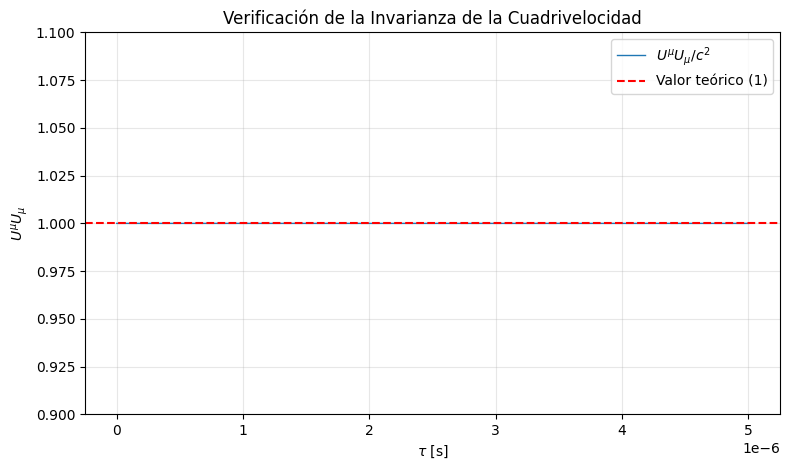

In [ ]:
plt.figure(figsize=(8,4.8))
plt.plot(tau_eval, Umu_mag / (c**2), lw=1, label=r'$U^\mu U_\mu / c^2$') # Plot Umu_mag/c^2 array vs tau_eval array
plt.axhline(y=1.0, color='red', linestyle='--', label='Valor teórico (1)') # Add horizontal line at 1
plt.xlabel(r'$\tau$ [s]')
plt.ylabel(r'$U^\mu U_\mu$') # Updated label to reflect the quantity being plotted
plt.title('Verificación de la Invarianza de la Cuadrivelocidad') # Updated title
plt.ylim(0.9, 1.1) # Updated y-axis limits
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Podemos ver que el cociente $U^\mu U_\mu / c^2$ permanece constante  durante toda la integración, lo que confirma que el movimiento se conserva en el régimen relativista y que el campo magnético, al no realizar trabajo, solo modifica la dirección del movimiento del electrón sin alterar su energía total.

## Matriz de Lorentz y tensor electromagnético en el sistema del electrón

Queremos saber cómo ve el electrón los campos en su propio sistema de referencia instantáneo ($S'$), es decir, el sistema donde él está momentáneamente en reposo.

Supongamos que el electrón tiene una velocidad instantánea $\mathbf{v}$ respecto al laboratorio ($S$), definimos entonces el vector adimensional $\boldsymbol{\beta} = \mathbf{v}/c$ y el factor de Lorentz $\gamma = 1/\sqrt{1-\beta^2}$, de esta forma, la matriz de boost general en dirección $\boldsymbol{\beta}$ es:

$$\Lambda =
\begin{pmatrix}
\gamma & -\gamma\beta_x & -\gamma\beta_y & -\gamma\beta_z\\[6pt]
-\gamma\beta_x & 1+(\gamma-1)\dfrac{\beta_x^2}{\beta^2} & (\gamma-1)\dfrac{\beta_x\beta_y}{\beta^2} & (\gamma-1)\dfrac{\beta_x\beta_z}{\beta^2}\\[6pt]
-\gamma\beta_y & (\gamma-1)\dfrac{\beta_y\beta_x}{\beta^2} & 1+(\gamma-1)\dfrac{\beta_y^2}{\beta^2} & (\gamma-1)\dfrac{\beta_y\beta_z}{\beta^2}\\[6pt]
-\gamma\beta_z & (\gamma-1)\dfrac{\beta_z\beta_x}{\beta^2} & (\gamma-1)\dfrac{\beta_z\beta_y}{\beta^2} & 1+(\gamma-1)\dfrac{\beta_z^2}{\beta^2}
\end{pmatrix}$$

O en notación compacta:

$$\Lambda_{00} = \gamma, \quad \Lambda_{0i} = \Lambda_{i0} = -\gamma\beta_i, \quad \Lambda_{ij} = \delta_{ij} + \frac{(\gamma-1)}{\beta^2} \beta_i \beta_j$$

Esta matriz transforma cualquier cuadrivector $A^\mu$ entre el sistema del laboratorio (S) y el sistema en reposo instantáneo del electrón (S'):$$A'^{\mu} = \Lambda^{\mu}{}_{\nu} A^{\nu}$$

Definamos entonces la matriz del boost de Lorentz para la transofrmación

In [ ]:
def boost_lorentz(v, c):
  v2 = np.dot(v, v)
  beta2 = v2 / (c * c)

  # Evitamos que la velocidad sea mayor que c
  if beta2 >= 1.0:
      raise ValueError("||v|| debe ser < 1")

  gamma = 1.0 / np.sqrt(1.0 - beta2)
  beta = v / c

  # (γ - 1)/β² = γ²/(γ + 1)
  k = (gamma * gamma) / (gamma + 1.0)

  # Λ_{00} = γ
  # Λ_{0i} = Λ_{i0} = -γ β_i
  # Λ_{ij} = δ_{ij} + (γ - 1) β_i β_j / β²
  Lam = np.eye(4)  # Matriz identidad
  Lam[0, 0] = gamma
  Lam[0, 1:4] = -gamma * beta
  Lam[1:4, 0] = -gamma * beta

  # Parte espacial
  Lam[1:4, 1:4] = np.eye(3) + k * np.outer(beta, beta)

  return Lam, gamma

### Transformación del tensor de Lorentz

El tensor electromagnético $F^{\mu\nu}$ (usando la convención $F^{0i} = -E^i/c$ y $F^{ij} = -\varepsilon^{ijk}B_k$) relaciona los campos de forma que:

$$F^{\mu\nu} =
\begin{pmatrix}
0 & -E_x/c & -E_y/c & -E_z/c \\
E_x/c & 0 & -B_z & B_y \\
E_y/c & B_z & 0 & -B_x \\
E_z/c & -B_y & B_x & 0
\end{pmatrix}$$

Pero en el laboratorio no hay campo eléctrico ($\mathbf{E} = 0$), por lo tanto, el tensor que vamos a transformar es:

$$F^{\alpha\beta} =
\begin{pmatrix}
0 & 0 & 0 & 0 \\
0 & 0 & -B_z & B_y \\
0 & B_z & 0 & -B_x \\
0 & -B_y & B_x & 0
\end{pmatrix}$$

In [ ]:
# Construimos el tensor electromagnético a partir de los vectores E y B
def tensor_Faraday(E, B, c):
  # Convención: F^{0i} = -E^i/c,  F^{ij} = -ε^{ijk} B_k
  F = np.zeros((4, 4))

  # Tiempo-espacio
  F[0, 1:4] = -E / c
  F[1:4, 0] = E / c

  # Espacial-espacial
  Bx, By, Bz = B
  F[1, 2], F[2, 1] = -Bz, Bz
  F[1, 3], F[3, 1] = By, -By
  F[2, 3], F[3, 2] = -Bx, Bx

  return F


In [ ]:
# Elegimos un punto de la trayectoria
i = len(t) // 2  # Mitad del recorrido

# Tomamos el valor de cada posición y velocidad en el instante i
xi, yi, zi = x[i], y[i], z[i]
uxi, uyi, uzi = ux[i], uy[i], uz[i]

# Campo magnético en el laboratorio en ese punto
r2_i = max(xi * xi + yi * yi, r_min**2)
Bx_i = -B1 * yi / r2_i
By_i = B1 * xi / r2_i
Bz_i = B0
B_lab_i = np.array([Bx_i, By_i, Bz_i])
E_lab_i = np.zeros(3)  # E = 0 en S

# Podemos calcular gamma y v mediante U = γv
Ui2 = uxi * uxi + uyi * uyi + uzi * uzi
gamma_i = np.sqrt(1.0 + Ui2 / (c**2))
vi = np.array([uxi, uyi, uzi]) / gamma_i  # v = U / γ

Con estos valores podemos calcular el boost de Lorentz

In [ ]:
Lam, gamma_boost = boost_lorentz(vi, c)

Con los valores del campo eléctri y magnético podemos determinar el tensor de Faraday

In [ ]:
F = tensor_Faraday(E_lab_i, B_lab_i, c)
print(f"Tensor de Faraday en el laboratorio \n {F}")

Tensor de Faraday en el laboratorio 
 [[ 0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -5.00000000e-04  2.77046217e-07]
 [ 0.00000000e+00  5.00000000e-04  0.00000000e+00  4.71675480e-06]
 [ 0.00000000e+00 -2.77046217e-07 -4.71675480e-06  0.00000000e+00]]


El tensor en el sistema del electrón ($S'$) se obtiene aplicando la transformación tensorial:

$$F'^{\mu\nu} = \Lambda^{\mu}{}_{\alpha}\, \Lambda^{\nu}{}_{\beta}\, F^{\alpha\beta}$$

O en forma matricial compacta $F' = \Lambda F \Lambda^T$.









Si el movimiento del electrón es a lo largo del eje $z$ (es decir, $\boldsymbol{\beta} = (0,0,\beta)$), la matriz de boost se simplifica a:

$$\Lambda =
\begin{pmatrix}
\gamma & 0 & 0 & -\gamma\beta\\[4pt]
0 & 1 & 0 & 0\\[4pt]
0 & 0 & 1 & 0\\[4pt]
-\gamma\beta & 0 & 0 & \gamma
\end{pmatrix}$$

Aplicando la multiplicación $F' = \Lambda F \Lambda^{T}$, se obtiene:


$$F'^{\mu\nu} =
\begin{pmatrix}
\gamma & 0 & 0 & -\gamma\beta \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
-\gamma\beta & 0 & 0 & \gamma
\end{pmatrix}
\begin{pmatrix}
0 & 0 & 0 & 0 \\
0 & 0 & -B_z & B_y \\
0 & B_z & 0 & -B_x \\
0 & -B_y & B_x & 0
\end{pmatrix}
\begin{pmatrix}
\gamma & 0 & 0 & -\gamma\beta \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
-\gamma\beta & 0 & 0 & \gamma
\end{pmatrix}^T$$


De modo que:

$$F'^{\mu\nu} =
\begin{pmatrix}
0 & \gamma\beta B_y & -\gamma\beta B_x & 0 \\
-\gamma\beta B_y & 0 & -B_z & \gamma B_y \\
\gamma\beta B_x & B_z & 0 & -\gamma B_x \\
0 & -\gamma B_y & \gamma B_x & 0
\end{pmatrix}$$

In [ ]:
F_prima = Lam @ F @ Lam.T
print(f"Tensor de Faraday en el sistema de referencia del electrón \n {F_prima}")

Tensor de Faraday en el sistema de referencia del electrón 
 [[ 1.44276517e-21 -5.47746715e-04 -2.80931743e-04 -5.01151174e-06]
 [ 5.47746715e-04 -1.16002218e-23 -5.27302036e-04 -5.29067547e-04]
 [ 2.80931743e-04  5.27302036e-04 -1.22264870e-21 -2.66526999e-04]
 [ 5.01151174e-06  5.29067547e-04  2.66526999e-04 -2.11263712e-21]]


Por definición:

$$E'_i = -c \, F'^{0i}, \quad B'_k = -\frac{1}{2} \, \varepsilon_{kij} \, F'^{ij}.$$

De la matriz $F'^{\mu\nu}$ obtenida:


$$\begin{aligned}
E'_x &= -c F'^{01} = -c(\gamma\beta B_y) = -\gamma(c\beta)B_y = -\gamma v_z B_y \\[5pt]
E'_y &= -c F'^{02} = -c(-\gamma\beta B_x) = \gamma(c\beta)B_x = \gamma v_z B_x \\[5pt]
E'_z &= -c F'^{03} = -c(0) = 0
\end{aligned}$$

Por lo tanto, el campo eléctrico en el sistema del electrón es:$$\mathbf{E}' = (-\gamma v_z B_y, \, \gamma v_z B_x, \, 0)$$

O de la forma vectorial general:$$\mathbf{E}' = \gamma \, (\mathbf{v} \times \mathbf{B})$$

Similarmente, de las componentes espaciales de $F'^{\mu\nu}$:

$$\begin{aligned}
B'_x &= -F'^{23} = -(-\gamma B_x) = \gamma B_x, \\[5pt]
B'_y &= -F'^{31} = F'^{13} = \gamma B_y \\[5pt]
B'_z &= -F'^{12} = -(-B_z) = B_z
\end{aligned}$$

Por tanto:

$$\mathbf{B}' = (\gamma B_x, \, \gamma B_y, \, B_z).$$

De las componentes de $F'^{\mu\nu}$ podemos ver que:
$$\begin{aligned}
\mathbf{E}' &= \gamma \, (\mathbf{v} \times \mathbf{B}), \\
\mathbf{B}'_\parallel &= \mathbf{B}_\parallel, \\
\mathbf{B}'_\perp &= \gamma \, \mathbf{B}_\perp.
\end{aligned}$$

De este modo, con el tensor de Farday en el sistema de refencia del electrón podemos calcular los campos $E$ y $B$ en el sistema primado.

In [ ]:
# Calculamos los campos E y B desde el tensor de Faraday
def campos(F, c):
  E = -c * F[0, 1:4]

  eps = np.zeros((3, 3, 3))
  eps[0, 1, 2] = eps[1, 2, 0] = eps[2, 0, 1] = 1.0
  eps[0, 2, 1] = eps[2, 1, 0] = eps[1, 0, 2] = -1.0

  # Bk = -1/2 ε_{kij} F^{ij}
  B = np.zeros(3)
  for k in range(3):
    s = 0.0
    # Calculamos cada componente Bk combinando las comp. espaciales
    for i in range(3):
      for j in range(3):
        s += eps[k, i, j] * F[1 + i, 1 + j]
    B[k] = -0.5 * s

  return E, B

In [ ]:
# Extraempos los campos en S' a partir de F'
E_prima, B_prima = campos(F_prima, c)

Comparemos entonces los campos en el laboratorio ($S$) con los campos en el sistema del electrón ($S'$)

In [ ]:
print(f"Punto muestreado t = {t[i]}")
print(f"Posiciones r = ({x[i]:.2f}, {y[i]:.2f}, {z[i]:.2f})")
print(f"Velocidades v = ({vi[0]:.2f}, {vi[1]:.2f}, {vi[2]:.2f})")
print(f"|v|/c = {np.linalg.norm(vi) / c:.6f},   gamma = {gamma_i:.6f}")

Punto muestreado t = 7.503751875909709e-05
Posiciones r = (0.37, 6.34, 22461.36)
Velocidades v = (-8438204.53, 11113195.89, 299300768.07)
|v|/c = 0.999444,   gamma = 30.000000


In [ ]:
# Campo en el laboratorio
print(f"Campo eléctrico en el laboratorio: E = ({E_lab_i[0]}, {E_lab_i[1]}, {E_lab_i[2]})")
print(f"Campo magnético en el laboratorio: B = ({B_lab_i[0]}, {B_lab_i[1]}, {B_lab_i[2]})")

Campo eléctrico en el laboratorio: E = (0.0, 0.0, 0.0)
Campo magnético en el laboratorio: B = (-4.7167547989666976e-06, 2.7704621722346285e-07, 0.0005)


In [ ]:
# Campo en el sistema del electrón
print(f"Campo eléctrico en el sistema del electrón: E' = ({E_prima[0]}, {E_prima[1]}, {E_prima[2]})")
print(f"Campo magnético en el sistema del electrón: B' = ({B_prima[0]}, {B_prima[1]}, {B_prima[2]})")

Campo eléctrico en el sistema del electrón: E' = (164210.33403272522, 84221.21790129784, 1502.4134225185496)
Campo magnético en el sistema del electrón: B' = (0.0002665269988603844, -0.0005290675470979872, 0.0005273020362885251)


Comprobemos que esto concuerde con la teoría

In [ ]:
# Descomponemos en las componentes paralela y perpendicular
v_hat = vi / np.linalg.norm(vi)
B_par_lab  = np.dot(B_lab_i, v_hat) * v_hat
B_perp_lab = B_lab_i - B_par_lab

In [ ]:
# Teóricamente E' = γ (v × B)
E_teo_prima = gamma_i * np.cross(vi, B_lab_i)
# B'_∥ = B_∥,  B'_⟂ = γ B_⟂
B_teo_prima = B_par_lab + gamma_i * B_perp_lab

In [ ]:
def rel_err(a, b):
  den = np.maximum(np.linalg.norm(b), 1e-300)
  return np.linalg.norm(a - b) / den

err_E = rel_err(E_prima, E_teo_prima)
err_B = rel_err(B_prima, B_teo_prima)
print(f"Error relativo en E': {err_E:.2e}")
print(f"Error relativo en B': {err_B:.2e}")

Error relativo en E': 1.21e-13
Error relativo en B': 9.37e-14


Es decir, que aunque en el SR del laboratorio no existe un campo eléctrico medible, en el sistema de referencia del electrón sí aparece un campo eléctrico efectivo debido a su movimiento a través del campo magnético, pues edsde el punto de vista del electrón, este campo surge por la transformación relativista de los campos electromagnéticos: al moverse con velocidad $\mathbf{v}$ en un campo magnético $\mathbf{B}$, el observador en su sistema propio percibe un campo eléctrico inducido

$$
\mathbf{E}' = \gamma \, (\mathbf{v} \times \mathbf{B}),
$$

Podemos ver que, el movimiento del electrón a través de las líneas de campo magnético genera en su marco de referencia instantáneo, un campo eléctrico que actúa sobre él como si se tratara de una “fuerza electromotriz” inducida.




# **Radiación sincrotrón**

En el sistema de laboratorio, la fuerza de Lorentz en su forma relativista está dada por
$$
\frac{d\vec{p}}{dt} = q(\vec{v}_L \times \vec{B})
$$
donde $\vec{p} = \gamma m \vec{v}_L$ es el momento relativista del electrón.


Dado que el campo magnético no realiza trabajo sobre la partícula (la fuerza es siempre perpendicular a $\vec{v}_L$), la energía cinética y, por tanto, $\gamma$, permanecen constantes durante el movimiento.
Así, la ecuación anterior se simplifica a
$$
\gamma m \frac{d\vec{v}_L}{dt} = q(\vec{v}_L \times \vec{B})
$$
que representa la forma relativista de la segunda ley de Newton en presencia de un campo magnético.

La fuerza $q(\vec{v}_L \times \vec{B})$ actúa perpendicularmente a la velocidad, de modo que la magnitud $v = \|\vec{v}_L\|$ no varía, sino únicamente la dirección del vector de velocidad.
El movimiento resultante es helicoidal. Si consideramos la componente de la velocidad perpendicular al campo magnético, $v_\perp$, la fuerza magnética actúa como una fuerza centrípeta que mantiene al electrón girando alrededor de las líneas de campo. La aceleración centrípeta tiene magnitud $a_c = v_\perp^2 / r_g$, donde $r_g$ es el radio de giro (radio de Larmor), de este modo, si igualamos la magnitud de la fuerza de Lorentz con la expresión relativista de la fuerza centrípeta:
$$
\gamma m \frac{v_\perp^2}{r_g} = |q| v_\perp |B|
$$
podemos despejar el radio de giro relativista:
$$
r_g = \frac{\gamma m v_\perp}{|q| |B|}
$$
La frecuencia angular de giro $\omega_g$ (en rad/s) se obtiene a partir de la relación $\omega_g = v_\perp / r_g$, lo que da
$$
\omega_g = \frac{|q| |B|}{\gamma m}
$$

Finalmente, la frecuencia de giro $f_g$ (en Hz) se obtiene dividiendo la frecuencia angular entre $2\pi$:
$$
f_g = \frac{\omega_g}{2\pi} = \frac{|q| |B|}{2\pi \gamma m}
$$


In [ ]:
e = -q

## Frecuencia de giro

A partir de la definición de la cuadrivelocidad:
$$
U^\mu = \gamma(c,\, \mathbf{v})$$
De donde despejando las componentes espaciales tenemos que:
$$
\mathbf{v} = \frac{\mathbf{U}}{\gamma}, \quad \text{con} \quad \gamma = \sqrt{1 + \frac{|\mathbf{U}|^2}{c^2}}
$$

In [ ]:
# Magnitudes físicas en la trayectoria
U2 = ux**2 + uy**2 + uz**2
gamma = np.sqrt(1.0 + U2 / c**2)

# Componentes ordinarias de la velocidad del electrón
vx, vy, vz = ux / gamma, uy / gamma, uz / gamma
v_mag = np.sqrt(vx**2 + vy**2 + vz**2)

# Campo B en cada punto
r2 = x**2 + y**2
r2 = np.where(r2 < r_min**2, r_min**2, r2)

Bx = -B1 * y / r2
By = B1 * x / r2
Bz = B0 * np.ones_like(x)

B_mag = np.sqrt(Bx**2 + By**2 + Bz**2)

Sabemos que la frecuencia de giro es qué tan rápido gira el electrón en el plano perpendicular al campo magnético.

A partir de la trayectoria podemos calcular el ángulo azimutal como:
$$
\theta(t) = \arctan\!\left(\frac{y}{x}\right)
$$

y su derivada temporal:

$$
\frac{d\theta}{dt} = \omega_g = 2\pi f_g
$$
Podemos entonces ver la frecuencia como

$$
f_g = \frac{\omega}{2\pi}
$$


Veamos entonces su comportamiento en el plano xy

In [ ]:
# Ángulo azimutal en el plano xy
f_g_teo = (np.abs(q) * B_mag) / (2.0 * np.pi * gamma * m)  # Frecuencia teórica [Hz]

theta = np.arctan2(y, x)
theta_unwrapped = np.unwrap(theta)
dtheta_dt = np.gradient(theta_unwrapped, t)
f_g_exp = np.abs(dtheta_dt) / (2.0 * np.pi)

print(f"La media de la frecuencia de giro experimental es = {np.mean(f_g_exp):.6e} Hz")
print(f"La media de la frecuencia de giro teórica es = {np.mean(f_g_teo):.6e} Hz")

La media de la frecuencia de giro experimental es = 2.033015e+05 Hz
La media de la frecuencia de giro teórica es = 4.666493e+05 Hz


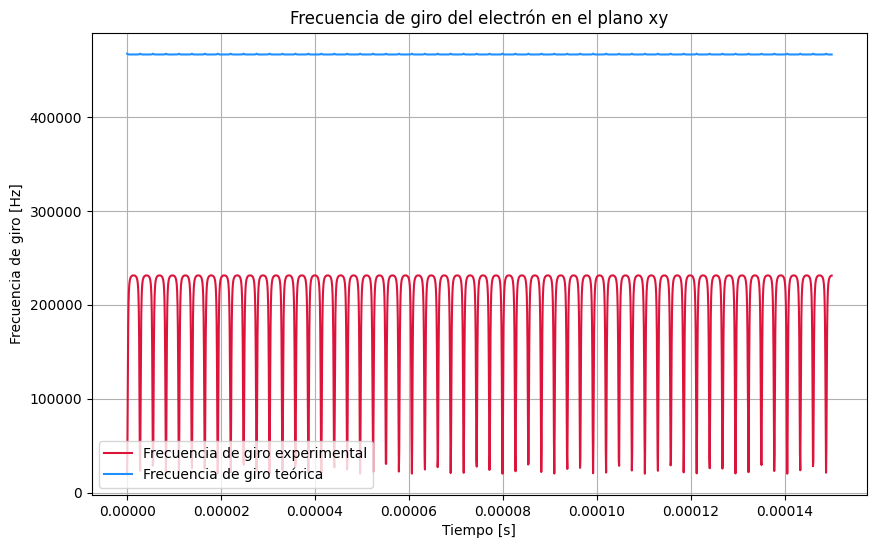

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(t, f_g_exp, color='crimson', label='Frecuencia de giro experimental')
plt.plot(t, f_g_teo, color='dodgerblue', label='Frecuencia de giro teórica')
plt.xlabel('Tiempo [s]')
plt.ylabel('Frecuencia de giro [Hz]')
plt.title('Frecuencia de giro del electrón en el plano xy')
plt.legend()
plt.grid()
plt.show()


Podemos ver un comportamiento oscilante y periódico asociado al movimiento helicoidal del electrón en el campo magnético del jet.

## Frecuencia crítica y de pico

Por radiación sincrotrón, la energía se concentra alrededor de una frecuencia crítica:
$$
f_{\mathrm{crit}} = \frac{3}{4\pi}\,\gamma^2\,\frac{e\,B_\perp}{m_e},
$$
donde $B_\perp$ es la componente perpendicular del campo.

La frecuencia de pico del espectro de emisión es aproximadamente:
$$
f_{\mathrm{peak}} \approx 0.29\, f_{\mathrm{crit}}.
$$


Dado un vector unitario de dirección de velocidad:
$$
\hat{\mathbf{v}} = \frac{\mathbf{v}}{|\mathbf{v}|}
$$
la proyección perpendicular del campo es:
$$
\mathbf{B}_\perp = \mathbf{B} - (\mathbf{B}\cdot\hat{\mathbf{v}})\hat{\mathbf{v}}, \qquad B_\perp = |\mathbf{B}_\perp|.
$$

In [ ]:
eps = 1e-30
vx_hat = vx / (v_mag + eps)
vy_hat = vy / (v_mag + eps)
vz_hat = vz / (v_mag + eps)

B_dot_vhat = Bx * vx_hat + By * vy_hat + Bz * vz_hat

Bx_perp = Bx - B_dot_vhat * vx_hat
By_perp = By - B_dot_vhat * vy_hat
Bz_perp = Bz - B_dot_vhat * vz_hat

# Componenete del campo perpendicular
B_perp = np.sqrt(Bx_perp**2 + By_perp**2 + Bz_perp**2)

In [ ]:
f_crit = (3.0 / (4.0 * np.pi)) * (gamma**2) * (e * B_perp / m)
f_peak = 0.29 * f_crit
print(f"La frecuencia crítica del electrón es = {np.mean(f_crit):.6e} Hz")
print(f"La frecuencia de pico del electrón es = {np.mean(f_peak):.6e} Hz")

La frecuencia crítica del electrón es = 8.156865e+08 Hz
La frecuencia de pico del electrón es = 2.365491e+08 Hz


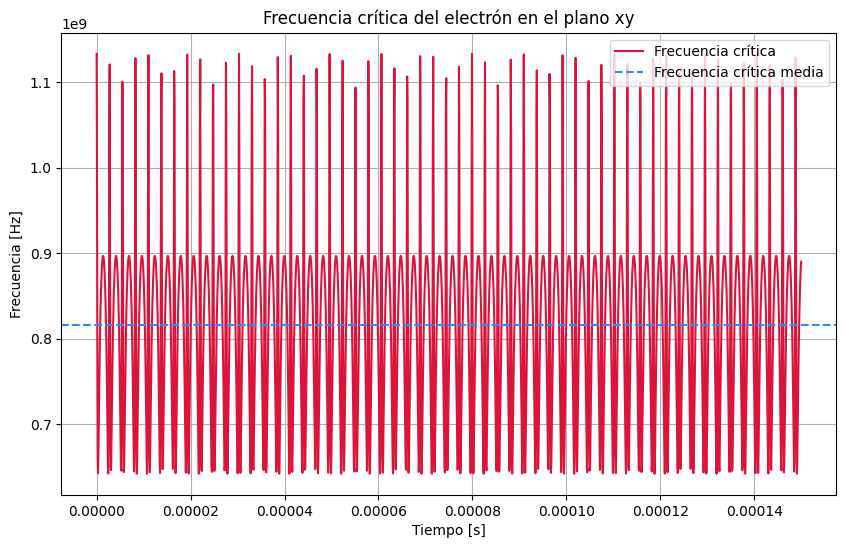

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(t, f_crit, color = 'crimson' ,label='Frecuencia crítica')
plt.axhline(np.mean(f_crit), color='dodgerblue', linestyle='--', label='Frecuencia crítica media')
plt.xlabel('Tiempo [s]')
plt.ylabel('Frecuencia [Hz]')
plt.title('Frecuencia crítica del electrón en el plano xy')
plt.legend()
plt.grid()
plt.show()

La frecuencia crítica aumenta y disminuye de forma periódica a medida que varía el ángulo entre la velocidad del electrón y el campo magnético.

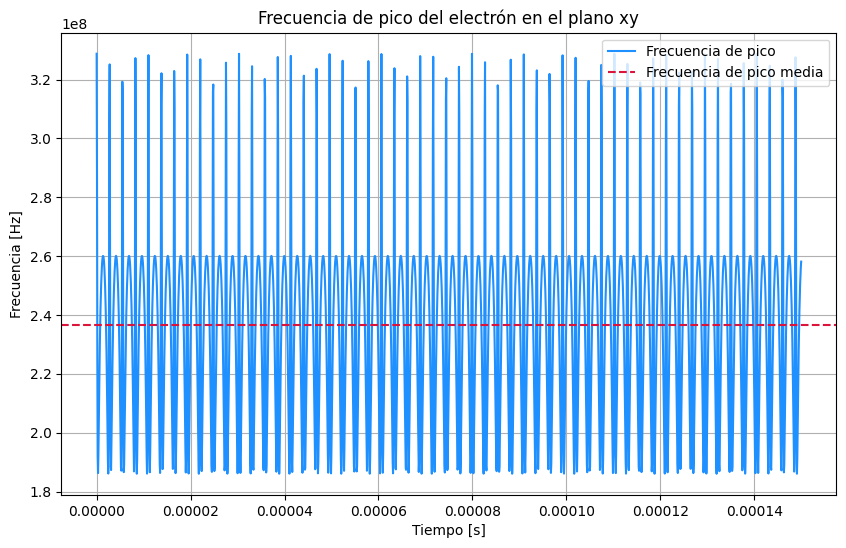

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(t, f_peak,color='dodgerblue', label='Frecuencia de pico')
plt.axhline(np.mean(f_peak), color='crimson', linestyle='--', label='Frecuencia de pico media')
plt.xlabel('Tiempo [s]')
plt.ylabel('Frecuencia [Hz]')
plt.title('Frecuencia de pico del electrón en el plano xy')
plt.legend()
plt.grid()
plt.show()

Se observa un patrón oscilatorio períodico que muestra el movimiento helicoidal de la partícula en el campo magnético del jet.

Finalmente, la frecuencia crítica a lo largo de la trayectoria del electrón será

/tmp/ipython-input-1170528551.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


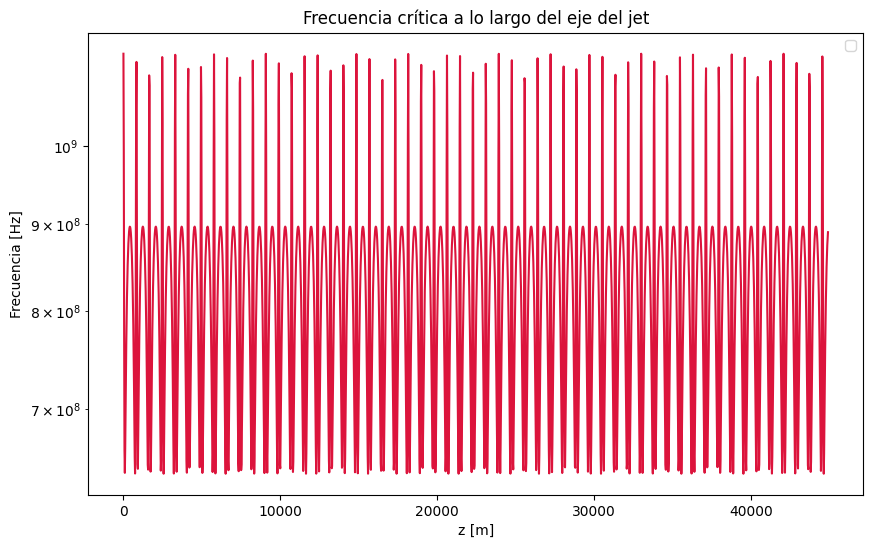

In [ ]:
plt.figure(figsize=(10, 6))
plt.semilogy(z, f_crit, color = 'crimson')
plt.xlabel('z [m]')
plt.ylabel('Frecuencia [Hz]')
plt.title('Frecuencia crítica a lo largo del eje del jet')
plt.legend()

# ** Beaming relativista en el jet**

El fenómeno del beaming se debe a la aberración relativista,de modo que, aunque supongamos que el electrón emite radiación de forma isotrópica en su propio sistema en reposo, en el sistema del observador (laboratorio) esta emisión queda enfocada en un cono en la dirección instantánea del movimiento. De la teoría sabemos que que el semiángulo de apertura de este cono de emisión es aproximadamente:$$\theta_\mathrm{beam} \approx \frac{1}{\gamma}
$$donde $\gamma$ es el factor de Lorentz instantáneo del electrón.

Podemos ver que para valores grandes de $\gamma$, el ángulo de apertura del cono de emisión, $\theta_\mathrm{beam} \sim 1/\gamma$, se vuelve extremadamente pequeño, de manera que el haz de radiación solo intersecta la línea de visión durante un intervalo muy brevepor tanto, los pulsos de luz observados se harán más cortos.

De este modo, el observador solo detectará un pulso de luz si su línea de visión se encuentra dentro de este cono de emisión. A medida que el electrón se desplaza siguiendo su trayectoria helicoidal, la dirección de su velocidad cambia continuamente, haciendo que el cono de radiación también se desplace. Cada vez que el eje del cono apunta brevemente hacia el observador, la intensidad aparente aumenta de forma drástica, produciendo un pico en la curva de luz, este efecto se amplifica por el factor Doppler relativista, dado por
$$
D = \frac{1}{\gamma(1 - \boldsymbol{\beta}\cdot \hat{n})}
$$
el cual modifica tanto la intensidad como la frecuencia observada, luego, la intensidad transformada se comporta aproximadamente como
$$
I_\nu \propto D^3 I'_{\nu'},
$$



En el análisis geométrico del problema, fijamos el ángulo azimutal $\phi = 0$ y trabajamos en el plano $xz$, de modo que la dirección del observador quede contenida en dicho plano. Bajo esta elección, el vector unitario que apunta hacia el observador se puede escribir como
$$
\hat{n} = (\sin\theta_{\mathrm{obs}},\, 0,\, \cos\theta_{\mathrm{obs}}),
$$

Para determinar los instantes en los que el haz de radiación se encuentra alineado con la línea de visión del observador, introducimos el ángulo de apuntado $\psi$, definido por
$$
\cos\psi = \hat{v}\cdot\hat{n},
$$
donde $\hat{v}$ es el vector unitario en la dirección de la velocidad instantánea del electrón. Cuando el valor de $\psi$ es muy pequeño (es decir, cuando $\cos\psi \approx 1$), la dirección del movimiento del electrón coincide prácticamente con la del observador, y la radiación emitida se concentra dentro del cono de enfoque definido por $\theta_\mathrm{beam}$.



In [ ]:
# Definimos el vector beta = v/c y su módulo
beta = np.column_stack((vx / c, vy / c, vz / c))
beta_mag = np.linalg.norm(beta, axis=1) + eps

In [ ]:
# Calculamos la función que determina la intensidad aparente I(t)
def curva_I(theta_deg, gate=True, p=3):
  # Definimos el ángulo del observador
  th = np.deg2rad(theta_deg)  # Ángulo en radianes
  n = np.array([np.sin(th), 0.0, np.cos(th)])  # Vector observador
  beta_dot_n = beta @ n  # Producto escalar β·n

  # Calculamos el factor Doppler
  D = 1.0 / (gamma * (1.0 - beta_dot_n))
  I = D**p  # Intensidad proporcional a D^p

  if gate:
    cos_alpha = np.clip(beta_dot_n / beta_mag, -1.0, 1.0)
    alpha = np.arccos(cos_alpha)
    theta_b = 1.0 / gamma  # Apertura del cono
    I = np.where(alpha <= theta_b, I, 0.0)  # Emite solo dentro del cono

  I /= (np.max(I) + eps)  # Normalizamos
  return I

Veamos entonces cómo se comporta la intensidad dependiendo del efecto beaming y gate relativistas para diferentes ángulos

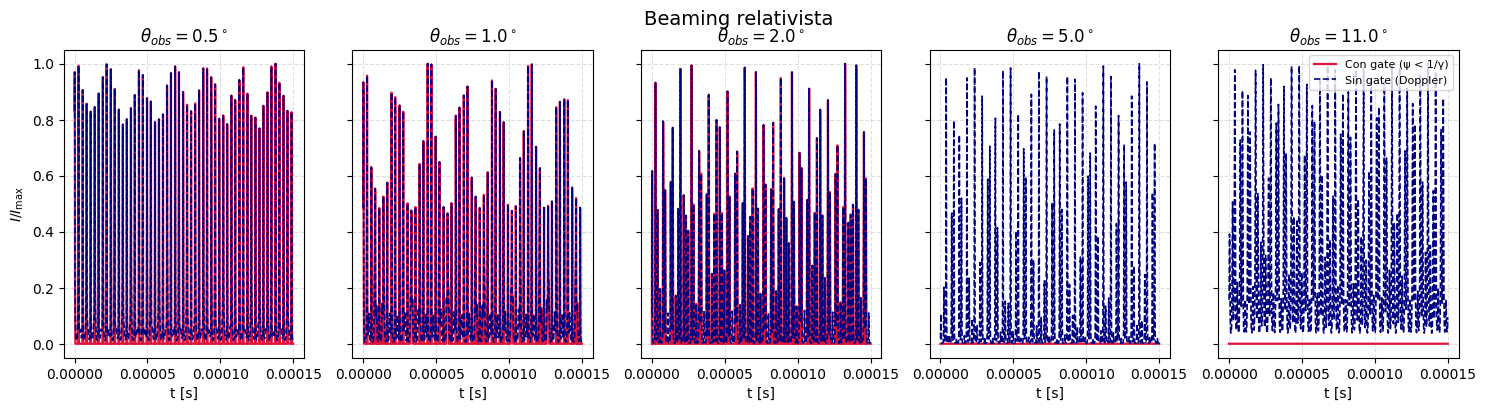

In [ ]:
angulos = [0.5, 1.0, 2.0, 5.0, 11.0]

fig, axes = plt.subplots(1, len(angulos), figsize=(18, 4), sharey=True)
for ax, th in zip(axes, angulos):
  I_gate = curva_I(th, gate=True)
  I_nogate = curva_I(th, gate=False)
  ax.plot(t, I_gate, color='crimson', lw=1.6, label='Con gate (ψ < 1/γ)')
  ax.plot(t, I_nogate, color='navy', lw=1.2, ls='--', label='Sin gate (Doppler)')
  ax.set_title(fr"$\theta_{{obs}} = {th:.1f}^\circ$")
  ax.set_xlabel("t [s]")
  ax.grid(True, ls='--', alpha=0.4)

axes[0].set_ylabel(r"$I/I_{\max}$")
fig.suptitle("Beaming relativista", fontsize=14)
axes[-1].legend(loc='upper right', fontsize=8)
plt.show()

Podemos ver cómo la intensidad aparente $I/I_{\max}$ depende del ángulo de observación cuando se incluye o no la colimación relativista del haz.

 En los casos sin gate (azul), la radiación modulada por el factor Doppler es visible en todos los ángulos, aunque su amplitud disminuye al alejarse del eje del movimiento. En cambio, al aplicar el gate (rojo), que restringe la emisión al cono de apertura $1/\gamma$, la señal se mantiene solo para observadores muy próximos al eje  y desaparece  fuera de él. Es decir, odemos ver que la readiación solo se puede ver cuando el movimiento de la partícula apunta casi directamente hacia el observador.